In [1]:
import matplotlib.pyplot as plt
import random
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from keras.models import model_from_json


Using TensorFlow backend.


In [2]:
def plot3d_basic(X1, X2, y, elev = 30, azim = -60):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.view_init(elev = elev, azim=azim)
    surf = ax.plot_surface(X1, X2, y)
    plt.show()

def plot3d_basic_scatter(X1, X2, y, elev = 30, azim = -60):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.view_init(elev = elev, azim=azim)
    surf = ax.scatter(X1, X2, y)
    plt.show()

def plot3d(X1, X2, y):
    plot3d_basic(X1, X2, y)
    plot3d_basic(X1, X2, y, elev = 70, azim = -30)
    plot3d_basic(X1, X2, y, elev = 60, azim =-80)
    

In [3]:
def target_function(x1, x2):
    return (x1-1)**2 + (x2-2)**2 < 9

In [44]:
grid_X1 = np.arange(-10, 10, 0.2)
grid_X2 = np.arange(-10, 10, 0.2)
grid_X1, grid_X2 = np.meshgrid(grid_X1, grid_X2)

grid_large_X1 = np.arange(-30, 30, 1)
grid_large_X2 = np.arange(-30, 30, 1)
grid_large_X1, grid_large_X2 = np.meshgrid(grid_large_X1, grid_large_X2)



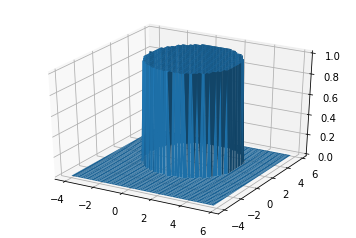

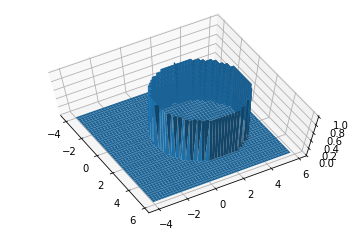

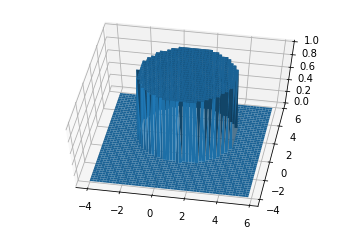

In [5]:
y = []
for i in range(len(grid_X1)):
    x1 = grid_X1[i]
    x2 = grid_X2[i]
    y_ = target_function(x1, x2)
    y.append(y_)

plot3d(grid_X1, grid_X2, np.array(y))


In [6]:
def plot_2d(X, y):
    for i in range(len(X)):
        x = X[i]
        result = y[i]
        if result == True:
            color = 'b'
        else:
            color = 'r'
        plt.scatter(x[0], x[1], marker= '.', color=color)
#         plt.ylim([-3,4])
#         plt.xlim([-5,5])
#     plt.axis((-5, 5, -5, 5))
    plt.axis('equal')
    plt.show()


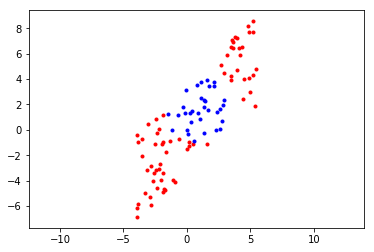

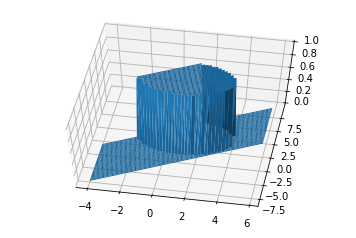

In [7]:
def generate_dataset(num_samples = 100):
    X = []
    results = []
    for i in range(num_samples):
        x1 = random.uniform(-4, 6)
        beta = random.uniform(-3.5, 3.5)
        x2 = x1 + beta
        X.append((x1, x2))
        result = target_function(x1, x2)
        if result:
            results.append(1)
        else:
            results.append(0)
    return X, results

dataset_X, dataset_y = generate_dataset(5000)
plot_2d(dataset_X[:100], dataset_y[:100])
# plot_2d(dataset_X, dataset_y)


interest_zone_X1 = np.arange(-4, 6, 0.2)
interest_zone_X2 = np.arange(-3.5, 3.5, 0.2)
interest_zone_X1, interest_zone_X2 = np.meshgrid(interest_zone_X1, interest_zone_X2)
interest_zone_X2 = interest_zone_X1 + interest_zone_X2
interest_zone_y = []
for i in range(len(interest_zone_X1)):
    x1 = interest_zone_X1[i]
    x2 = interest_zone_X2[i]
    y_ = target_function(x1, x2)
    interest_zone_y.append(y_)
        
plot3d_basic(interest_zone_X1, interest_zone_X2, interest_zone_y, elev = 60, azim =-80)



In [8]:
def full_grid_predict(model, grid_X1, grid_X2):
    y = []
    for i in range(len(grid_X1)):
        x1 = grid_X1[i]
        x2 = grid_X2[i]
        y_ = model.predict(np.array([x1, x2]).swapaxes(0, 1))
        y_ = np.array(y_).flatten()
        y.append(y_)
    return y
    
def plot_model_predictions(model, grid_X1, grid_X2):
    y = full_grid_predict(model, grid_X1, grid_X2)
    plot3d(grid_X1, grid_X2, y)


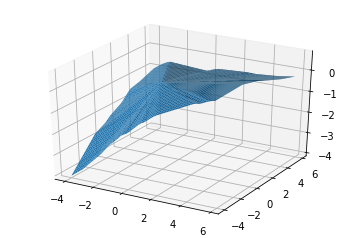

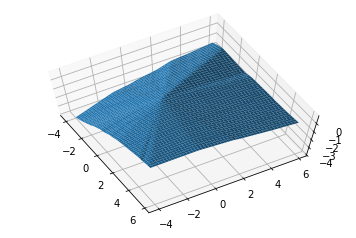

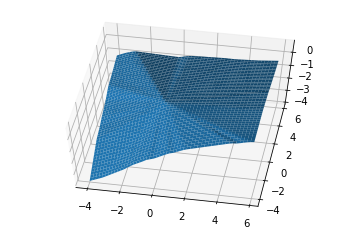

Train on 4000 samples, validate on 1000 samples
Epoch 1/30
4000/4000 [==============================] - 0s - loss: 0.8534 - acc: 0.4513 - val_loss: 0.1620 - val_acc: 0.7380
Epoch 2/30
4000/4000 [==============================] - 0s - loss: 0.1228 - acc: 0.8448 - val_loss: 0.0996 - val_acc: 0.8830
Epoch 3/30
4000/4000 [==============================] - 0s - loss: 0.0843 - acc: 0.9025 - val_loss: 0.0773 - val_acc: 0.9090
Epoch 4/30
4000/4000 [==============================] - 0s - loss: 0.0703 - acc: 0.9183 - val_loss: 0.0680 - val_acc: 0.9130
Epoch 5/30
4000/4000 [==============================] - 0s - loss: 0.0632 - acc: 0.9303 - val_loss: 0.0631 - val_acc: 0.9250
Epoch 6/30
4000/4000 [==============================] - 0s - loss: 0.0587 - acc: 0.9370 - val_loss: 0.0585 - val_acc: 0.9250
Epoch 7/30
4000/4000 [==============================] - 0s - loss: 0.0545 - acc: 0.9435 - val_loss: 0.0552 - val_acc: 0.9400
Epoch 8/30
4000/4000 [==============================] - 0s - loss: 0.0522 - a

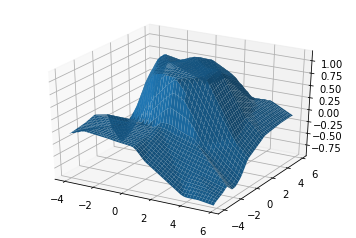

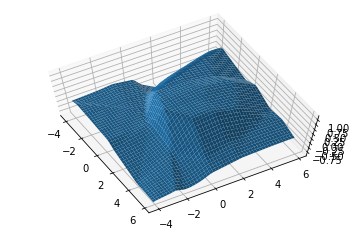

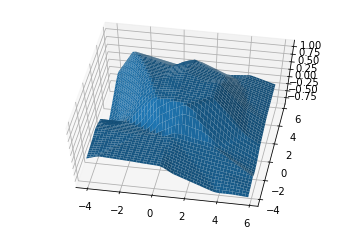

Train on 4000 samples, validate on 1000 samples
Epoch 1/30
4000/4000 [==============================] - 0s - loss: 0.0269 - acc: 0.9835 - val_loss: 0.0299 - val_acc: 0.9830
Epoch 2/30
4000/4000 [==============================] - 0s - loss: 0.0264 - acc: 0.9870 - val_loss: 0.0286 - val_acc: 0.9840
Epoch 3/30
4000/4000 [==============================] - 0s - loss: 0.0253 - acc: 0.9875 - val_loss: 0.0281 - val_acc: 0.9850
Epoch 4/30
4000/4000 [==============================] - 0s - loss: 0.0249 - acc: 0.9845 - val_loss: 0.0275 - val_acc: 0.9850
Epoch 5/30
4000/4000 [==============================] - 0s - loss: 0.0241 - acc: 0.9888 - val_loss: 0.0277 - val_acc: 0.9850
Epoch 6/30
4000/4000 [==============================] - 0s - loss: 0.0234 - acc: 0.9895 - val_loss: 0.0263 - val_acc: 0.9850
Epoch 7/30
4000/4000 [==============================] - 0s - loss: 0.0232 - acc: 0.9890 - val_loss: 0.0258 - val_acc: 0.9870
Epoch 8/30
4000/4000 [==============================] - 0s - loss: 0.0226 - a

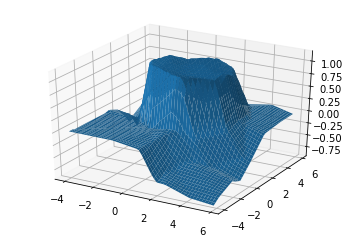

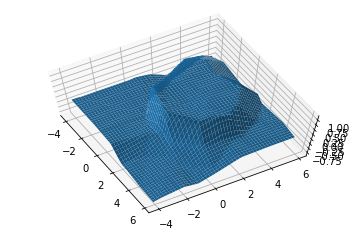

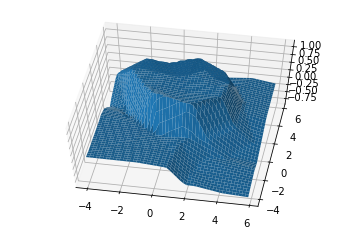

Train on 4000 samples, validate on 1000 samples
Epoch 1/30
4000/4000 [==============================] - 0s - loss: 0.0140 - acc: 0.9922 - val_loss: 0.0172 - val_acc: 0.9910
Epoch 2/30
4000/4000 [==============================] - 0s - loss: 0.0143 - acc: 0.9908 - val_loss: 0.0163 - val_acc: 0.9880
Epoch 3/30
4000/4000 [==============================] - 0s - loss: 0.0133 - acc: 0.9935 - val_loss: 0.0160 - val_acc: 0.9910
Epoch 4/30
4000/4000 [==============================] - 0s - loss: 0.0131 - acc: 0.9925 - val_loss: 0.0168 - val_acc: 0.9850
Epoch 5/30
4000/4000 [==============================] - 0s - loss: 0.0128 - acc: 0.9915 - val_loss: 0.0157 - val_acc: 0.9830
Epoch 6/30
4000/4000 [==============================] - 0s - loss: 0.0128 - acc: 0.9940 - val_loss: 0.0154 - val_acc: 0.9850
Epoch 7/30
4000/4000 [==============================] - 0s - loss: 0.0123 - acc: 0.9928 - val_loss: 0.0159 - val_acc: 0.9830
Epoch 8/30
4000/4000 [==============================] - 0s - loss: 0.0124 - a

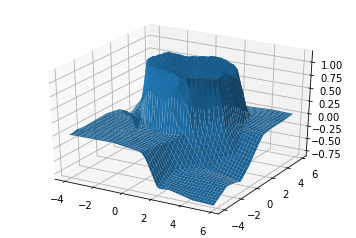

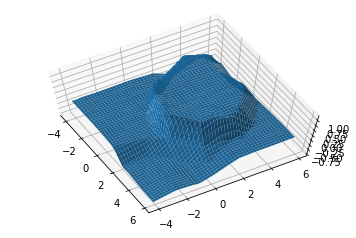

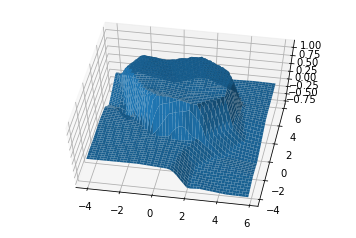

Train on 4000 samples, validate on 1000 samples
Epoch 1/30
4000/4000 [==============================] - 0s - loss: 0.0095 - acc: 0.9938 - val_loss: 0.0122 - val_acc: 0.9870
Epoch 2/30
4000/4000 [==============================] - 0s - loss: 0.0095 - acc: 0.9933 - val_loss: 0.0122 - val_acc: 0.9860
Epoch 3/30
4000/4000 [==============================] - 0s - loss: 0.0098 - acc: 0.9920 - val_loss: 0.0115 - val_acc: 0.9890
Epoch 4/30
4000/4000 [==============================] - 0s - loss: 0.0089 - acc: 0.9940 - val_loss: 0.0117 - val_acc: 0.9860
Epoch 5/30
4000/4000 [==============================] - 0s - loss: 0.0089 - acc: 0.9933 - val_loss: 0.0117 - val_acc: 0.9870
Epoch 6/30
4000/4000 [==============================] - 0s - loss: 0.0086 - acc: 0.9952 - val_loss: 0.0125 - val_acc: 0.9920
Epoch 7/30
4000/4000 [==============================] - 0s - loss: 0.0091 - acc: 0.9920 - val_loss: 0.0127 - val_acc: 0.9850
Epoch 8/30
4000/4000 [==============================] - 0s - loss: 0.0087 - a

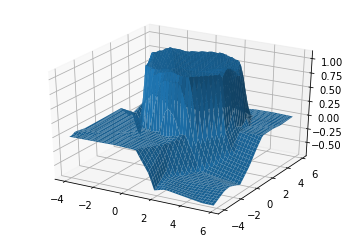

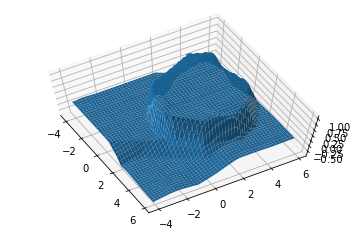

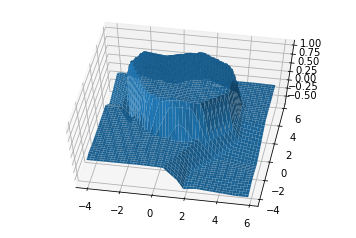

Train on 4000 samples, validate on 1000 samples
Epoch 1/30
4000/4000 [==============================] - 0s - loss: 0.0070 - acc: 0.9955 - val_loss: 0.0101 - val_acc: 0.9870
Epoch 2/30
4000/4000 [==============================] - 0s - loss: 0.0071 - acc: 0.9952 - val_loss: 0.0105 - val_acc: 0.9840
Epoch 3/30
4000/4000 [==============================] - 0s - loss: 0.0072 - acc: 0.9940 - val_loss: 0.0099 - val_acc: 0.9870
Epoch 4/30
4000/4000 [==============================] - 0s - loss: 0.0069 - acc: 0.9938 - val_loss: 0.0104 - val_acc: 0.9850
Epoch 5/30
4000/4000 [==============================] - 0s - loss: 0.0069 - acc: 0.9948 - val_loss: 0.0102 - val_acc: 0.9880
Epoch 6/30
4000/4000 [==============================] - 0s - loss: 0.0068 - acc: 0.9935 - val_loss: 0.0111 - val_acc: 0.9840
Epoch 7/30
4000/4000 [==============================] - 0s - loss: 0.0068 - acc: 0.9948 - val_loss: 0.0101 - val_acc: 0.9890
Epoch 8/30
4000/4000 [==============================] - 0s - loss: 0.0069 - a

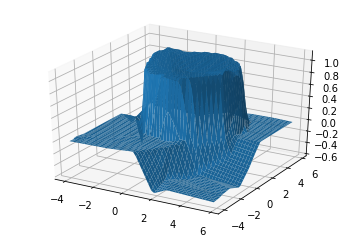

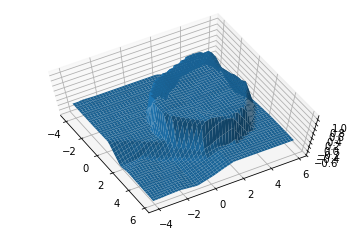

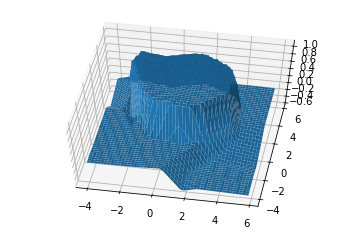

Saved model to disk


In [9]:
from keras.models import Sequential
model = Sequential()
# TODO: Build a Multi-layer feedforward neural network with Keras here.
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten

model.add(Dense(10, input_shape=(2,)))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('relu'))
model.add(Dense(1))

model.compile('adam', 'mean_squared_error', ['accuracy'])

plot_model_predictions(model, grid_X1, grid_X2)

for i in range(5):
    history = model.fit(dataset_X, dataset_y, nb_epoch=30, validation_split=0.2)
    plot_model_predictions(model, grid_X1, grid_X2)
    
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

In [10]:
def load_model():
    # load json and create model
    json_file = open('model.json', 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)
    # load weights into new model
    loaded_model.load_weights("model.h5")
    print("Loaded model from disk")
    loaded_model.compile('adam', 'mean_squared_error', ['accuracy'])
    return loaded_model


Loaded model from disk
interest zone


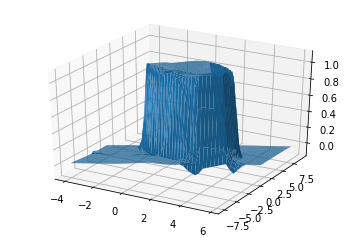

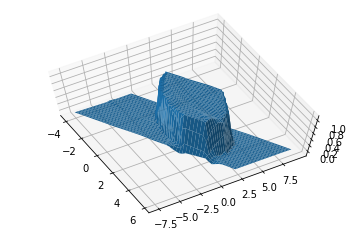

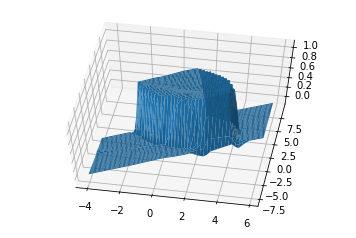

grid


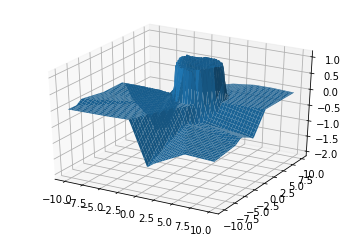

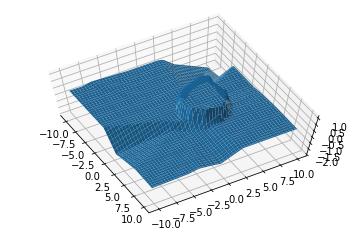

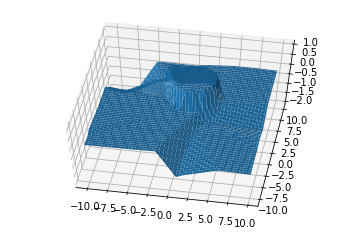

In [17]:
model = load_model()

print("interest zone")
plot_model_predictions(model, interest_zone_X1, interest_zone_X2)

print("grid")
plot_model_predictions(model, grid_X1, grid_X2)



Loaded model from disk


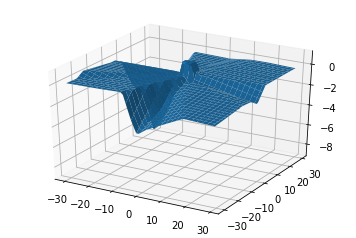

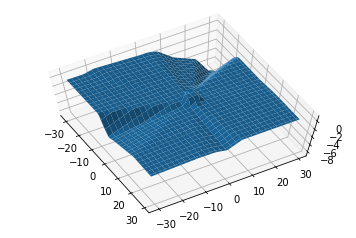

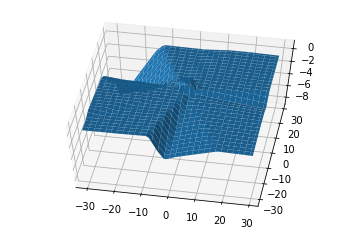

predicted before [[-0.00806482]]
Epoch 1/1
1/1 [==============================] - 0s - loss: 6.5041e-05 - acc: 1.0000
predicted after [[ 0.01696867]]


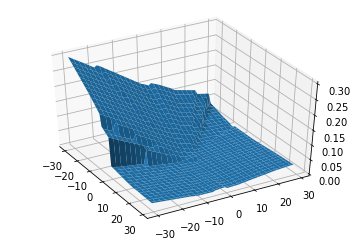

In [45]:
model = load_model()

plot_model_predictions(model, grid_large_X1, grid_large_X2)

y = model.predict(np.array([[-2], [-2]]).swapaxes(0, 1))
print('predicted before {}'.format(y))

before = full_grid_predict(model, grid_large_X1, grid_large_X2)
model.fit(np.array([[-2, -2]]), np.array([0]), nb_epoch=1, validation_split=0)
after = full_grid_predict(model, grid_large_X1, grid_large_X2)

z = model.predict(np.array([[-2], [-2]]).swapaxes(0, 1))
print('predicted after {}'.format(z))

plot3d_basic(grid_large_X1, grid_large_X2, np.array(after) - np.array(before), elev = 40, azim=-30)

# fig = plt.figure()
# ax = fig.gca(projection='3d')
# ax.view_init(elev = 40, azim=-30)
# ax.plot_surface(grid_large_X1, grid_large_X2, np.array(after) - np.array(before))
        
# plt.hold(True)

# ax.scatter(-2, -2, 0.25, c='green')
# plt.show()

# model = load_model()

# z = model.predict(np.array([[-2], [-2]]).swapaxes(0, 1))
# print('predicted before {}'.format(z))

# before = full_grid_predict(model, grid_large_X1, grid_large_X2)
# model.fit(np.array([[-2, -2]]), np.array([1]), nb_epoch=1, validation_split=0)
# after = full_grid_predict(model, grid_large_X1, grid_large_X2)

# z = model.predict(np.array([[-2], [-2]]).swapaxes(0, 1))
# print('predicted after {}'.format(z))

# plot3d(grid_large_X1, grid_large_X2, np.array(after) - np.array(before))


Loaded model from disk


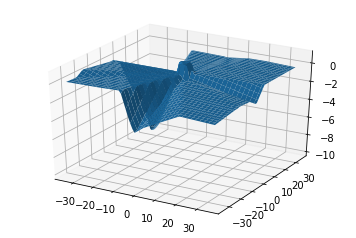

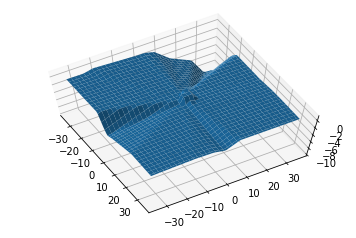

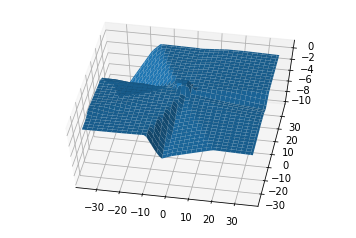

predicted before [[-0.00806482]]
Train on 4000 samples, validate on 1000 samples
Epoch 1/1
4000/4000 [==============================] - 0s - loss: 0.0059 - acc: 0.9942 - val_loss: 0.0091 - val_acc: 0.9910
predicted after [[ 0.01146804]]


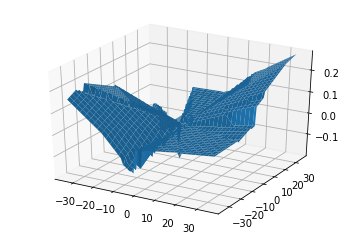

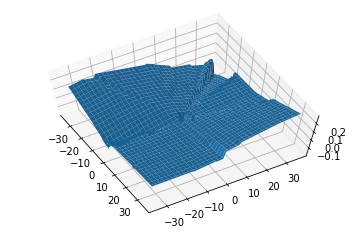

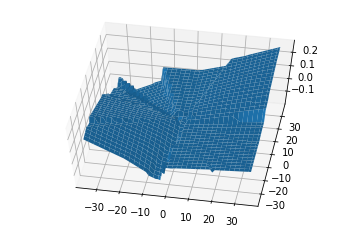

Loaded model from disk


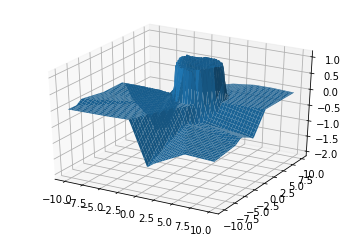

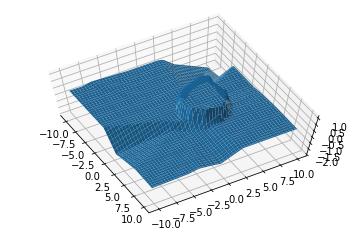

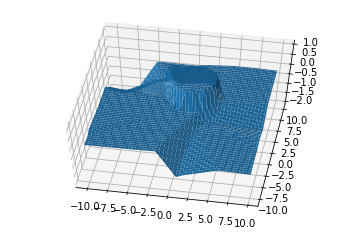

predicted before [[-0.00806482]]
Train on 4000 samples, validate on 1000 samples
Epoch 1/1
4000/4000 [==============================] - 0s - loss: 0.0059 - acc: 0.9950 - val_loss: 0.0101 - val_acc: 0.9850
predicted after [[ 0.01789142]]


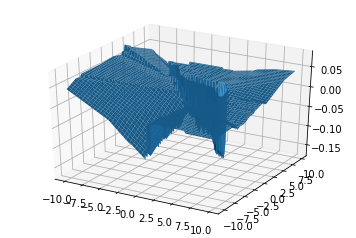

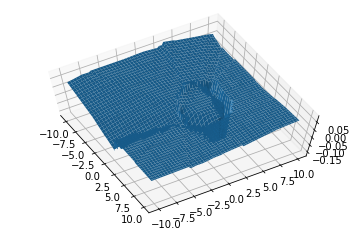

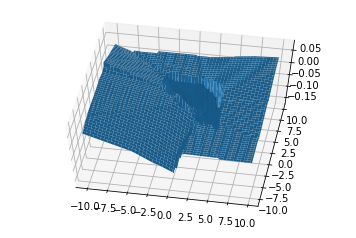

In [18]:
model = load_model()

plot_model_predictions(model, grid_large_X1, grid_large_X2)

y = model.predict(np.array([[-2], [-2]]).swapaxes(0, 1))
print('predicted before {}'.format(y))

before = full_grid_predict(model, grid_large_X1, grid_large_X2)
model.fit(dataset_X, dataset_y, nb_epoch=1, validation_split=0.2)
after = full_grid_predict(model, grid_large_X1, grid_large_X2)

z = model.predict(np.array([[-2], [-2]]).swapaxes(0, 1))
print('predicted after {}'.format(z))

plot3d(grid_large_X1, grid_large_X2, np.array(after) - np.array(before))


model = load_model()

plot_model_predictions(model, grid_X1, grid_X2)

y = model.predict(np.array([[-2], [-2]]).swapaxes(0, 1))
print('predicted before {}'.format(y))

before = full_grid_predict(model, grid_X1, grid_X2)
model.fit(dataset_X, dataset_y, nb_epoch=1, validation_split=0.2)
after = full_grid_predict(model, grid_X1, grid_X2)

z = model.predict(np.array([[-2], [-2]]).swapaxes(0, 1))
print('predicted after {}'.format(z))

plot3d(grid_X1, grid_X2, np.array(after) - np.array(before))


